In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
gd = pd.read_excel(r"E:\MLP\Machine Learning\pure classification\weather_forecast.xlsx")
gd

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
gd.shape

(14, 5)

In [5]:
gd.dtypes

Outlook        object
Temperature    object
Humidity       object
Windy          object
Play           object
dtype: object

In [6]:
gd.isna().sum()

Outlook        0
Temperature    0
Humidity       0
Windy          0
Play           0
dtype: int64

In [9]:
gd['Play'].value_counts()

Play
Yes    9
No     5
Name: count, dtype: int64

In [11]:
x = gd.iloc[:,:-1]
x

,Outlook,Temperature,Humidity,Windy
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak
5,Rain,Cool,Normal,Strong
6,Overcast,Cool,Normal,Strong
7,Sunny,Mild,High,Weak
8,Sunny,Cool,Normal,Weak
9,Rain,Mild,Normal,Weak


In [12]:
y = gd.iloc[:,-1]
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play, dtype: object

In [15]:
ohe = OneHotEncoder(drop='first',sparse_output=False)
x_trf= ohe.fit_transform(x)

In [16]:
x_encoded = pd.DataFrame(x_trf,columns = ohe.get_feature_names_out(x.columns))
x_encoded                         

,Outlook_Rain,Outlook_Sunny,Temperature_Hot,Temperature_Mild,Humidity_Normal,Windy_Weak
0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,1.0
5,1.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,1.0,0.0,1.0,0.0,1.0
8,0.0,1.0,0.0,0.0,1.0,1.0
9,1.0,0.0,0.0,1.0,1.0,1.0


In [20]:
le = LabelEncoder()
y_trf = le.fit_transform(y)
y_trf

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [25]:
x_encoded.dtypes

Outlook_Rain        float64
Outlook_Sunny       float64
Temperature_Hot     float64
Temperature_Mild    float64
Humidity_Normal     float64
Windy_Weak          float64
dtype: object

In [27]:
y_trf.dtype

dtype('int32')

In [28]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_encoded,y_trf,test_size=0.2,random_state=25)
x_train,x_test,y_train,y_test

(    Outlook_Rain  Outlook_Sunny  Temperature_Hot  Temperature_Mild  Humidity_Normal  Windy_Weak
 5            1.0            0.0              0.0               0.0              1.0         0.0
 11           0.0            0.0              0.0               1.0              0.0         0.0
 1            0.0            1.0              1.0               0.0              0.0         0.0
 12           0.0            0.0              1.0               0.0              1.0         1.0
 13           1.0            0.0              0.0               1.0              0.0         0.0
 8            0.0            1.0              0.0               0.0              1.0         1.0
 2            0.0            0.0              1.0               0.0              0.0         1.0
 7            0.0            1.0              0.0               1.0              0.0         1.0
 6            0.0            0.0              0.0               0.0              1.0         0.0
 10           0.0            1

In [32]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11, 6), (3, 6), (11,), (3,))

In [47]:
DT = DecisionTreeClassifier(criterion='entropy')
DT

DecisionTreeClassifier(criterion='entropy')

In [48]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [49]:
y_pred_train = DT.predict(x_train)
y_pred_train

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1])

In [50]:
y_pred_test = DT.predict(x_test)
y_pred_test

array([0, 1, 0])

In [51]:
cr = classification_report(y_train,y_pred_train)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [52]:
cm = confusion_matrix(y_train,y_pred_train)
cm

array([[4, 0],
       [0, 7]], dtype=int64)

In [53]:
cr_test= classification_report(y_test,y_pred_test)
print(cr_test)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [54]:
cm_test= confusion_matrix(y_test,y_pred_test)
cm_test

array([[1, 0],
       [1, 1]], dtype=int64)

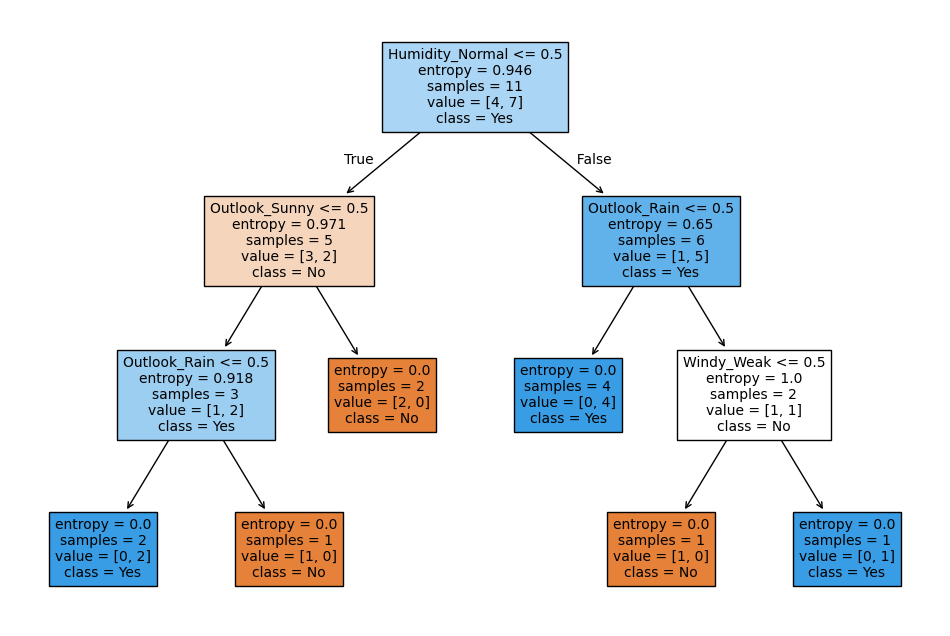

In [55]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(DT,feature_names=x_encoded.columns,class_names=['No','Yes'],filled=True,)
plt.show()